In [1]:
n0_of_features = 21
layer_1_size = 64
layer_2_size = 32
layer_3_size = 256
layer_4_size = 128
learning_rate = 0.005

In [2]:
from keras import Input, Model
from keras.layers import Dense


inputs = Input(shape=(n0_of_features,), name='input')
dense1 = Dense(layer_1_size,name='dense_1', activation='relu')(inputs)
dense2 = Dense(layer_2_size,name='dense_2', activation='relu')(dense1)
dense3 = Dense(layer_3_size,name='dense_3', activation='relu')(dense2)
dense4 = Dense(layer_4_size,name='dense_4', activation='relu')(dense3)
output1 = Dense(3,name='output', activation='softmax')(dense2)
#output2 = Dense(1,name='output_other_cancer', activation='softmax')(dense3)

model = Model(inputs = inputs, outputs = output1, name="sleep_health_classification_model")

In [3]:
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy
from keras.optimizers import Adam

model.compile(loss=CategoricalCrossentropy(name='crossentropy'),
              optimizer=Adam(learning_rate=learning_rate),
              metrics=[CategoricalAccuracy(name='accuracy')])


In [4]:
model.summary()

Model: "sleep_health_classification_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 21)]              0         
                                                                 
 dense_1 (Dense)             (None, 64)                1408      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 3)                 99        
                                                                 
Total params: 3587 (14.01 KB)
Trainable params: 3587 (14.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


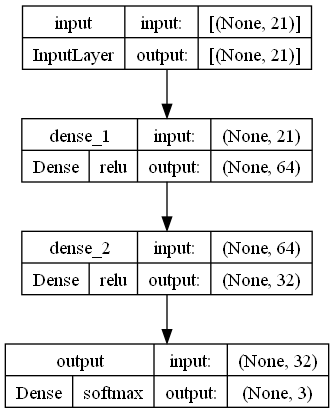

In [5]:
from keras.utils import plot_model

plot_model(model,to_file='model/model.png', show_shapes=True,show_layer_names=True, show_layer_activations=True)

In [6]:
model.save(filepath='model/model_conf.keras')